In [22]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [25]:
# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
df.shape

(20640, 9)

In [29]:
X = df.drop('MedHouseVal',axis = 1)
y = df["MedHouseVal"]
print(X.shape,y.shape)

(20640, 8) (20640,)


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [34]:
# Deep Network Construction
def get_model(inp_activation):
    model = Sequential()
    for _ in range(10):  # 10 hidden layers
        model.add(Dense(10, input_dim=8 if _ == 0 else None, activation=inp_activation))
    model.add(Dense(1, activation="linear"))  # Output layer for regression
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [35]:
# Helper function to compute gradients and percent changes (using weights before & after epoch)
def change_in_weight_gradient(old_weight, new_weight, learning_rate):
    gradient = (old_weight - new_weight) / learning_rate
    pct_change_weight = np.abs(100 * (old_weight - new_weight) / (old_weight + 1e-10))
    return gradient, pct_change_weight

In [37]:
# Build and inspect the deep linear network
linear_model = get_model("linear")
linear_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,091 (4.26 KB)

 Trainable params: 1,091 (4.26 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
linear_model.get_weights()[0]#these are weights of 1st hidden layer(neurons 10) from features(8)
linear_model.get_weights()[0].shape

(8, 10)

In [40]:
linear_model.get_weights()[0]

array([[-0.01794022, -0.15585524, -0.4419425 , -0.05231577,  0.03655308,
        -0.15290043, -0.13858801,  0.08854622, -0.5459521 ,  0.30481952],
       [ 0.39448708, -0.48199278, -0.25226218, -0.23985484, -0.3107856 ,
        -0.18135825,  0.02261126, -0.53331584,  0.11016113, -0.20955098],
       [ 0.28846782, -0.13471988, -0.5041678 , -0.26554245,  0.0393824 ,
        -0.15866303, -0.03836524,  0.30024922, -0.25835556,  0.4419272 ],
       [ 0.13452661, -0.48523805, -0.0049842 ,  0.38086152,  0.02280837,
         0.12655371,  0.38393348,  0.5294846 ,  0.24591106,  0.382945  ],
       [-0.1913487 ,  0.30418855, -0.1358076 ,  0.29586214,  0.23043597,
        -0.4259958 , -0.30710962, -0.17822409,  0.19013035,  0.380773  ],
       [-0.27697453,  0.3391593 ,  0.3377278 , -0.57352203,  0.15303296,
        -0.11144143, -0.45961887,  0.06577653, -0.07520992,  0.10978138],
       [ 0.3347515 , -0.11222839, -0.5104612 ,  0.04954517,  0.28836167,
         0.50095546, -0.10241017,  0.32071096

In [41]:
count = 0
for i in range(0, len(linear_model.get_weights()), 2):
  print(f'Layer_{count} shape of weights is: {linear_model.get_weights()[i].shape}')
  print(f'Layer_{count} shape of bias is: {linear_model.get_weights()[i+1].shape}')
  print('\n')
  count += 1

Layer_0 shape of weights is: (8, 10)
Layer_0 shape of bias is: (10,)


Layer_1 shape of weights is: (10, 10)
Layer_1 shape of bias is: (10,)


Layer_2 shape of weights is: (10, 10)
Layer_2 shape of bias is: (10,)


Layer_3 shape of weights is: (10, 10)
Layer_3 shape of bias is: (10,)


Layer_4 shape of weights is: (10, 10)
Layer_4 shape of bias is: (10,)


Layer_5 shape of weights is: (10, 10)
Layer_5 shape of bias is: (10,)


Layer_6 shape of weights is: (10, 10)
Layer_6 shape of bias is: (10,)


Layer_7 shape of weights is: (10, 10)
Layer_7 shape of bias is: (10,)


Layer_8 shape of weights is: (10, 10)
Layer_8 shape of bias is: (10,)


Layer_9 shape of weights is: (10, 10)
Layer_9 shape of bias is: (10,)


Layer_10 shape of weights is: (10, 1)
Layer_10 shape of bias is: (1,)




In [43]:
# Extract initial first layer weights before training or fitting the model
first_layer_weights_before = linear_model.get_weights()[0].copy()
first_layer_weights_before

array([[-0.01794022, -0.15585524, -0.4419425 , -0.05231577,  0.03655308,
        -0.15290043, -0.13858801,  0.08854622, -0.5459521 ,  0.30481952],
       [ 0.39448708, -0.48199278, -0.25226218, -0.23985484, -0.3107856 ,
        -0.18135825,  0.02261126, -0.53331584,  0.11016113, -0.20955098],
       [ 0.28846782, -0.13471988, -0.5041678 , -0.26554245,  0.0393824 ,
        -0.15866303, -0.03836524,  0.30024922, -0.25835556,  0.4419272 ],
       [ 0.13452661, -0.48523805, -0.0049842 ,  0.38086152,  0.02280837,
         0.12655371,  0.38393348,  0.5294846 ,  0.24591106,  0.382945  ],
       [-0.1913487 ,  0.30418855, -0.1358076 ,  0.29586214,  0.23043597,
        -0.4259958 , -0.30710962, -0.17822409,  0.19013035,  0.380773  ],
       [-0.27697453,  0.3391593 ,  0.3377278 , -0.57352203,  0.15303296,
        -0.11144143, -0.45961887,  0.06577653, -0.07520992,  0.10978138],
       [ 0.3347515 , -0.11222839, -0.5104612 ,  0.04954517,  0.28836167,
         0.50095546, -0.10241017,  0.32071096

In [45]:
# Train for one epoch only to highlight slow (vanishing) updates
history = linear_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

# Extract updated first layer weights after training
first_layer_weights_after = linear_model.get_weights()[0].copy()
first_layer_weights_after

array([[-0.00486723, -0.1474503 , -0.4291159 , -0.07292746,  0.02265253,
        -0.16742077, -0.12398231,  0.06510235, -0.5600166 ,  0.2906642 ],
       [ 0.40808758, -0.4733941 , -0.23820429, -0.24859731, -0.3251967 ,
        -0.19556588,  0.03651537, -0.5608974 ,  0.09563279, -0.22403345],
       [ 0.30164087, -0.12590669, -0.49068615, -0.2749776 ,  0.02554985,
        -0.17244625, -0.02410834,  0.27492544, -0.27235046,  0.4279905 ],
       [ 0.14790855, -0.47619042,  0.00889247,  0.37486184,  0.00878823,
         0.1128144 ,  0.3977371 ,  0.5032296 ,  0.23173793,  0.36888054],
       [-0.17783517,  0.31215432, -0.1221979 ,  0.28774822,  0.21600297,
        -0.44034705, -0.29537532, -0.20476307,  0.17520498,  0.36637065],
       [-0.2636794 ,  0.34613034,  0.35285982, -0.56888735,  0.13840465,
        -0.12382157, -0.45186254,  0.03958542, -0.09009521,  0.09591111],
       [ 0.34821668, -0.10322779, -0.4965585 ,  0.04246526,  0.27422354,
         0.48702696, -0.08868491,  0.29433948

In [46]:
# Get learning rate from optimizer config
learning_rate = tf.keras.optimizers.Adam().learning_rate.numpy()  # Default is 0.001
learning_rate

np.float32(0.001)

In [48]:
# Calculate change and percent change in weights
l_gradient, l_weight_change = change_in_weight_gradient(first_layer_weights_before, first_layer_weights_after, learning_rate)
l_gradient

array([[-13.072989 ,  -8.40494  , -12.826621 ,  20.611687 ,  13.900553 ,
         14.520347 , -14.6057005,  23.443861 ,  14.06449  ,  14.155328 ],
       [-13.600498 ,  -8.598685 , -14.057889 ,   8.742466 ,  14.411121 ,
         14.207631 , -13.904109 ,  27.581572 ,  14.528334 ,  14.482468 ],
       [-13.173043 ,  -8.813187 , -13.481647 ,   9.435146 ,  13.832544 ,
         13.7832155, -14.256904 ,  25.323776 ,  13.994902 ,  13.936698 ],
       [-13.381943 ,  -9.047627 , -13.876667 ,   5.999684 ,  14.020139 ,
         13.739309 , -13.8036   ,  26.25501  ,  14.173135 ,  14.064461 ],
       [-13.513535 ,  -7.965773 , -13.609699 ,   8.11392  ,  14.432996 ,
         14.351248 , -11.734306 ,  26.538982 ,  14.925375 ,  14.402359 ],
       [-13.295143 ,  -6.971031 , -15.132039 ,  -4.6346784,  14.628305 ,
         12.380137 ,  -7.7563224,  26.19111  ,  14.885298 ,  13.8702755],
       [-13.465196 ,  -9.000599 , -13.902723 ,   7.0799065,  14.138132 ,
         13.928502 , -13.725258 ,  26.371477 

In [49]:
l_weight_change

array([[ 72.86972   ,   5.3927865 ,   2.902328  ,  39.398613  ,
         38.028404  ,   9.496603  ,  10.538936  ,  26.476414  ,
          2.5761402 ,   4.643839  ],
       [  3.447641  ,   1.7839863 ,   5.5727296 ,   3.644899  ,
          4.636998  ,   7.8340144 ,  61.491966  ,   5.1717143 ,
         13.188258  ,   6.911191  ],
       [  4.5665555 ,   6.541861  ,   2.6740396 ,   3.5531597 ,
         35.123672  ,   8.6871    ,  37.160988  ,   8.434253  ,
          5.4169154 ,   3.1536186 ],
       [  9.9474325 ,   1.864575  , 278.41312   ,   1.5752928 ,
         61.469265  ,  10.856505  ,   3.5953107 ,   4.9585977 ,
          5.763521  ,   3.6727104 ],
       [  7.062256  ,   2.618696  ,  10.02131   ,   2.7424667 ,
          6.263344  ,   3.368871  ,   3.8208854 ,  14.890795  ,
          7.850075  ,   3.7824004 ],
       [  4.8001323 ,   2.0553856 ,   4.480543  ,   0.80810815,
          9.558925  ,  11.1090975 ,   1.6875553 ,  39.818325  ,
         19.791672  ,  12.634452  ],
       [  

In [50]:
print("\nFirst Layer Weights (Before Training):\n", first_layer_weights_before)
print("\nFirst Layer Weights (After Training):\n", first_layer_weights_after)
print("\nCalculated Gradient for First Layer:\n", l_gradient)
print("\nPercent Change in First Layer Weights:\n", l_weight_change)


First Layer Weights (Before Training):
 [[-0.01794022 -0.15585524 -0.4419425  -0.05231577  0.03655308 -0.15290043
  -0.13858801  0.08854622 -0.5459521   0.30481952]
 [ 0.39448708 -0.48199278 -0.25226218 -0.23985484 -0.3107856  -0.18135825
   0.02261126 -0.53331584  0.11016113 -0.20955098]
 [ 0.28846782 -0.13471988 -0.5041678  -0.26554245  0.0393824  -0.15866303
  -0.03836524  0.30024922 -0.25835556  0.4419272 ]
 [ 0.13452661 -0.48523805 -0.0049842   0.38086152  0.02280837  0.12655371
   0.38393348  0.5294846   0.24591106  0.382945  ]
 [-0.1913487   0.30418855 -0.1358076   0.29586214  0.23043597 -0.4259958
  -0.30710962 -0.17822409  0.19013035  0.380773  ]
 [-0.27697453  0.3391593   0.3377278  -0.57352203  0.15303296 -0.11144143
  -0.45961887  0.06577653 -0.07520992  0.10978138]
 [ 0.3347515  -0.11222839 -0.5104612   0.04954517  0.28836167  0.50095546
  -0.10241017  0.32071096 -0.12933362  0.47486603]
 [-0.402897   -0.5274563   0.07717186  0.2904781   0.17946172  0.2556013
  -0.5492523

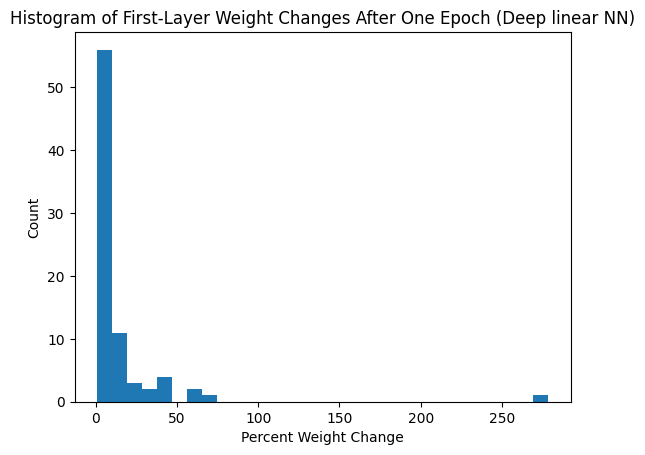

In [53]:
plt.hist(l_weight_change.ravel(), bins=30)
plt.title("Histogram of First-Layer Weight Changes After One Epoch (Deep linear NN)")
plt.xlabel("Percent Weight Change")
plt.ylabel("Count")
plt.show()

---

Tanh:

---

In [54]:
# Build and inspect the deep network with tanh
tanh_model = get_model("tanh")
tanh_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,091 (4.26 KB)

 Trainable params: 1,091 (4.26 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Extract initial first layer weights before training
first_layer_weights_before = tanh_model.get_weights()[0].copy()
first_layer_weights_before

array([[-0.5501731 , -0.19979304,  0.37396383,  0.10374594, -0.02687895,
        -0.17570686,  0.02143419, -0.27881008,  0.24933225,  0.20972717],
       [-0.5102417 ,  0.2962228 ,  0.566599  ,  0.05106717,  0.5729445 ,
        -0.4001584 ,  0.39208984, -0.34763122, -0.05458581,  0.05215335],
       [ 0.04727954,  0.21660584,  0.2731924 , -0.09953973,  0.1544128 ,
        -0.03956199, -0.19069415,  0.43789804, -0.04412651,  0.4840485 ],
       [ 0.5068463 , -0.35322148,  0.04776943,  0.39347106, -0.21043056,
        -0.40860704, -0.12054127,  0.05391228, -0.41261226,  0.06301129],
       [-0.5546124 , -0.43439692, -0.50806844, -0.10573566,  0.21923089,
         0.29043788,  0.05512071,  0.04733956,  0.35543448, -0.06834304],
       [ 0.24557179, -0.13314956, -0.47355548, -0.4384536 ,  0.06587237,
        -0.44469362,  0.5465534 , -0.5392772 ,  0.37322772, -0.23448563],
       [ 0.45874047,  0.3107264 , -0.36467737, -0.5695241 , -0.5373008 ,
         0.41163987, -0.20727065, -0.35510385

In [56]:
# Train for one epoch only to highlight slow (vanishing) updates
history = tanh_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

# Extract updated first layer weights after training
first_layer_weights_after = tanh_model.get_weights()[0].copy()
first_layer_weights_after

array([[-0.5501731 , -0.19979304,  0.35525092,  0.06908645, -0.02687895,
        -0.17570686,  0.03872894, -0.30202737,  0.25801048,  0.25330296],
       [-0.5102417 ,  0.2962228 ,  0.55062115,  0.05323265,  0.5729445 ,
        -0.4001584 ,  0.41139394, -0.36078432, -0.04070855,  0.06117015],
       [ 0.04727954,  0.21660584,  0.24568008, -0.09965653,  0.1544128 ,
        -0.03956199, -0.17128614,  0.41927844, -0.03059497,  0.5001221 ],
       [ 0.5068463 , -0.35322148,  0.02312343,  0.40670747, -0.21043056,
        -0.40860704, -0.10127594,  0.04012734, -0.39876753,  0.07473912],
       [-0.5546124 , -0.43439692, -0.5235911 , -0.09896467,  0.21923089,
         0.29043788,  0.07441098,  0.03317223,  0.37262553, -0.05410881],
       [ 0.24557179, -0.13314956, -0.48501632, -0.41700074,  0.06587237,
        -0.44469362,  0.56446606, -0.5550291 ,  0.38999662, -0.22231735],
       [ 0.45874047,  0.3107264 , -0.38372818, -0.557408  , -0.5373008 ,
         0.41163987, -0.18794619, -0.36997947

In [57]:
# Get learning rate from optimizer config
learning_rate = tf.keras.optimizers.Adam().learning_rate.numpy()  # Default is 0.001
learning_rate

np.float32(0.001)

In [58]:
# Calculate change and percent change in weights
tanh_gradient, tanh_weight_change = change_in_weight_gradient(first_layer_weights_before, first_layer_weights_after, learning_rate)
tanh_gradient

array([[  0.        ,   0.        ,  18.712908  ,  34.65949   ,
          0.        ,   0.        , -17.294752  ,  23.217289  ,
         -8.678227  , -43.57579   ],
       [  0.        ,   0.        ,  15.977859  ,  -2.1654813 ,
          0.        ,   0.        , -19.304096  ,  13.153106  ,
        -13.877264  ,  -9.016796  ],
       [  0.        ,   0.        ,  27.512325  ,   0.11680274,
          0.        ,   0.        , -19.408016  ,  18.619596  ,
        -13.531541  , -16.073584  ],
       [  0.        ,   0.        ,  24.646     , -13.2364025 ,
          0.        ,   0.        , -19.265337  ,  13.784937  ,
        -13.8447275 , -11.727832  ],
       [  0.        ,   0.        ,  15.522658  ,  -6.7709904 ,
          0.        ,   0.        , -19.290276  ,  14.167331  ,
        -17.191051  , -14.234233  ],
       [  0.        ,   0.        ,  11.46084   , -21.452873  ,
          0.        ,   0.        , -17.912685  ,  15.751898  ,
        -16.768902  , -12.168273  ],
       [  

In [59]:
tanh_weight_change

array([[ 0.        ,  0.        ,  5.0039353 , 33.408047  ,  0.        ,
         0.        , 80.687706  ,  8.327278  ,  3.4805877 , 20.77737   ],
       [ 0.        ,  0.        ,  2.819959  ,  4.240457  ,  0.        ,
         0.        ,  4.923386  ,  3.7836378 , 25.422842  , 17.28901   ],
       [ 0.        ,  0.        , 10.070678  ,  0.11734285,  0.        ,
         0.        , 10.177563  ,  4.2520394 , 30.665335  ,  3.3206558 ],
       [ 0.        ,  0.        , 51.59367   ,  3.3640094 ,  0.        ,
         0.        , 15.982359  , 25.569197  ,  3.3553846 , 18.612272  ],
       [ 0.        ,  0.        ,  3.05523   ,  6.403697  ,  0.        ,
         0.        , 34.99642   , 29.927046  ,  4.8366303 , 20.827627  ],
       [ 0.        ,  0.        ,  2.4201686 ,  4.8928494 ,  0.        ,
         0.        ,  3.27739   ,  2.920928  ,  4.4929414 ,  5.1893473 ],
       [ 0.        ,  0.        ,  5.2240167 ,  2.1274137 ,  0.        ,
         0.        ,  9.323301  ,  4.1890903 

In [60]:
print("\nFirst Layer Weights (Before Training):\n", first_layer_weights_before)
print("\nFirst Layer Weights (After Training):\n", first_layer_weights_after)
print("\nCalculated Gradient for First Layer:\n", tanh_gradient)
print("\nPercent Change in First Layer Weights:\n", tanh_weight_change)


First Layer Weights (Before Training):
 [[-0.5501731  -0.19979304  0.37396383  0.10374594 -0.02687895 -0.17570686
   0.02143419 -0.27881008  0.24933225  0.20972717]
 [-0.5102417   0.2962228   0.566599    0.05106717  0.5729445  -0.4001584
   0.39208984 -0.34763122 -0.05458581  0.05215335]
 [ 0.04727954  0.21660584  0.2731924  -0.09953973  0.1544128  -0.03956199
  -0.19069415  0.43789804 -0.04412651  0.4840485 ]
 [ 0.5068463  -0.35322148  0.04776943  0.39347106 -0.21043056 -0.40860704
  -0.12054127  0.05391228 -0.41261226  0.06301129]
 [-0.5546124  -0.43439692 -0.50806844 -0.10573566  0.21923089  0.29043788
   0.05512071  0.04733956  0.35543448 -0.06834304]
 [ 0.24557179 -0.13314956 -0.47355548 -0.4384536   0.06587237 -0.44469362
   0.5465534  -0.5392772   0.37322772 -0.23448563]
 [ 0.45874047  0.3107264  -0.36467737 -0.5695241  -0.5373008   0.41163987
  -0.20727065 -0.35510385  0.27757263  0.27724916]
 [ 0.5072621   0.5488399  -0.02921301 -0.38286504 -0.48229286 -0.38302335
  -0.145122

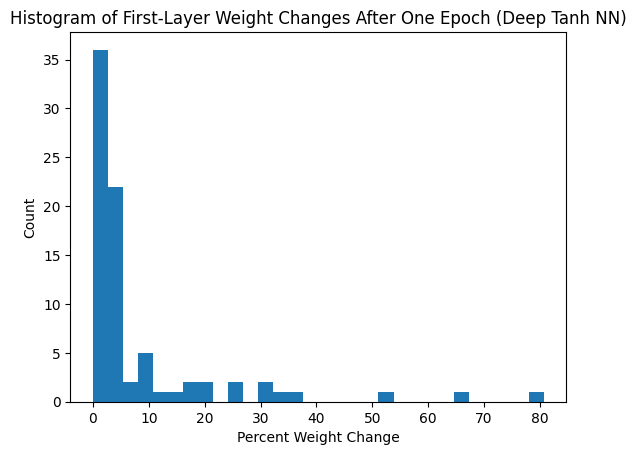

In [61]:
plt.hist(tanh_weight_change.ravel(), bins=30)
plt.title("Histogram of First-Layer Weight Changes After One Epoch (Deep Tanh NN)")
plt.xlabel("Percent Weight Change")
plt.ylabel("Count")
plt.show()

---

---

Relu:

In [62]:
# Build and inspect the deep sigmoid network
relu_model = get_model("relu")
relu_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,091 (4.26 KB)

 Trainable params: 1,091 (4.26 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Extract initial first layer weights before training
first_layer_weights_before = relu_model.get_weights()[0].copy()
first_layer_weights_before

array([[-0.16758037, -0.11327964,  0.21153396, -0.42786688, -0.5284613 ,
        -0.42192587, -0.5446598 , -0.49585974,  0.42412782,  0.49198163],
       [ 0.30571854, -0.3927744 , -0.17238891,  0.31816232,  0.24351102,
         0.19159883, -0.1446872 , -0.03212982,  0.5035361 , -0.55132776],
       [-0.44195864,  0.41206443, -0.01307398, -0.02268118, -0.15542716,
        -0.31838477, -0.425964  ,  0.27056372, -0.4004252 ,  0.11439174],
       [-0.0535121 ,  0.03495425, -0.50649124,  0.11710137,  0.5496477 ,
         0.38833308, -0.39980754, -0.3489569 ,  0.48391974, -0.30110157],
       [ 0.42841733, -0.02760947,  0.2450093 ,  0.14237106,  0.16877627,
         0.25818074,  0.52601707, -0.08119318, -0.23956579, -0.37767065],
       [-0.332551  , -0.16436192, -0.3098485 ,  0.3555975 ,  0.505376  ,
         0.05270165, -0.03290629, -0.26060548, -0.12099361, -0.35042593],
       [ 0.15017438, -0.5028487 , -0.16159803,  0.19407362, -0.5142619 ,
         0.23536551, -0.5638463 , -0.16427013

In [64]:
# Train for one epoch only to highlight slow (vanishing) updates
history = relu_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

# Extract updated first layer weights after training
first_layer_weights_after = relu_model.get_weights()[0].copy()
first_layer_weights_after

array([[-0.22167715,  0.40933025, -0.17238365,  0.02434152, -0.67703366,
        -0.92066693, -0.54905117, -0.49585974,  0.60629547,  0.49198163],
       [ 0.38327596, -0.15266554, -0.2805551 ,  0.48282412,  0.21838117,
        -0.01282141, -0.15254377, -0.03212982,  0.5732716 , -0.55132776],
       [-0.39985612,  0.7094841 , -0.17514867,  0.20909342, -0.20175341,
        -0.6028288 , -0.43723282,  0.27056372, -0.32649735,  0.11439174],
       [ 0.03296567,  0.16888557, -0.53598887,  0.20026223,  0.5423992 ,
         0.259264  , -0.4130649 , -0.3489569 ,  0.51561785, -0.30110157],
       [ 0.4184371 ,  0.01975844,  0.25470105,  0.16197385,  0.15017577,
         0.24595654,  0.5088835 , -0.08119318, -0.1478417 , -0.37767065],
       [-0.21673974, -0.04288416, -0.29665363,  0.4015529 ,  0.5257159 ,
        -0.02413   , -0.04048042, -0.26060548, -0.0650636 , -0.35042593],
       [ 0.22781456, -0.31759304, -0.20623475,  0.2966525 , -0.5270397 ,
         0.09681752, -0.57497525, -0.16427013

In [65]:
# Get learning rate from optimizer config
learning_rate = tf.keras.optimizers.Adam().learning_rate.numpy()  # Default is 0.001
learning_rate

np.float32(0.001)

In [66]:
# Calculate change and percent change in weights
relu_gradient, relu_weight_change = change_in_weight_gradient(first_layer_weights_before, first_layer_weights_after, learning_rate)
relu_gradient

array([[  54.096786 , -522.60986  ,  383.9176   , -452.20837  ,
         148.57237  ,  498.74103  ,    4.391372 ,    0.       ,
        -182.16763  ,    0.       ],
       [ -77.55741  , -240.10886  ,  108.16618  , -164.66179  ,
          25.129854 ,  204.42023  ,    7.856562 ,    0.       ,
         -69.735466 ,    0.       ],
       [ -42.102512 , -297.41965  ,  162.07468  , -231.77458  ,
          46.32625  ,  284.44403  ,   11.268824 ,    0.       ,
         -73.92785  ,    0.       ],
       [ -86.47777  , -133.93132  ,   29.497622 ,  -83.16086  ,
           7.248461 ,  129.06908  ,   13.257354 ,    0.       ,
         -31.698107 ,    0.       ],
       [   9.980231 ,  -47.3679   ,   -9.691745 ,  -19.602789 ,
          18.600508 ,   12.224196 ,   17.133593 ,    0.       ,
         -91.724075 ,    0.       ],
       [-115.81126  , -121.47775  ,  -13.194859 ,  -45.955387 ,
         -20.339905 ,   76.83165  ,    7.5741296,    0.       ,
         -55.930016 ,    0.       ],
       [ -

In [67]:
relu_weight_change

array([[3.22811012e+01, 4.61344940e+02, 1.81492188e+02, 1.05689041e+02,
        2.81141491e+01, 1.18205849e+02, 8.06259632e-01, 0.00000000e+00,
        4.29511185e+01, 0.00000000e+00],
       [2.53688946e+01, 6.11314964e+01, 6.27454453e+01, 5.17540207e+01,
        1.03198013e+01, 1.06691803e+02, 5.43003273e+00, 0.00000000e+00,
        1.38491497e+01, 0.00000000e+00],
       [9.52634811e+00, 7.21779480e+01, 1.23967358e+03, 1.02188086e+03,
        2.98057632e+01, 8.93397064e+01, 2.64548755e+00, 0.00000000e+00,
        1.84623375e+01, 0.00000000e+00],
       [1.61604156e+02, 3.83161774e+02, 5.82391596e+00, 7.10161285e+01,
        1.31874681e+00, 3.32366982e+01, 3.31593418e+00, 0.00000000e+00,
        6.55028200e+00, 0.00000000e+00],
       [2.32955837e+00, 1.71563995e+02, 3.95566416e+00, 1.37688026e+01,
        1.10208082e+01, 4.73474407e+00, 3.25723147e+00, 0.00000000e+00,
        3.82876358e+01, 0.00000000e+00],
       [3.48251114e+01, 7.39086990e+01, 4.25848770e+00, 1.29234295e+01,
   

In [68]:
print("\nFirst Layer Weights (Before Training):\n", first_layer_weights_before)
print("\nFirst Layer Weights (After Training):\n", first_layer_weights_after)
print("\nCalculated Gradient for First Layer:\n", relu_gradient)
print("\nPercent Change in First Layer Weights:\n", relu_weight_change)


First Layer Weights (Before Training):
 [[-0.16758037 -0.11327964  0.21153396 -0.42786688 -0.5284613  -0.42192587
  -0.5446598  -0.49585974  0.42412782  0.49198163]
 [ 0.30571854 -0.3927744  -0.17238891  0.31816232  0.24351102  0.19159883
  -0.1446872  -0.03212982  0.5035361  -0.55132776]
 [-0.44195864  0.41206443 -0.01307398 -0.02268118 -0.15542716 -0.31838477
  -0.425964    0.27056372 -0.4004252   0.11439174]
 [-0.0535121   0.03495425 -0.50649124  0.11710137  0.5496477   0.38833308
  -0.39980754 -0.3489569   0.48391974 -0.30110157]
 [ 0.42841733 -0.02760947  0.2450093   0.14237106  0.16877627  0.25818074
   0.52601707 -0.08119318 -0.23956579 -0.37767065]
 [-0.332551   -0.16436192 -0.3098485   0.3555975   0.505376    0.05270165
  -0.03290629 -0.26060548 -0.12099361 -0.35042593]
 [ 0.15017438 -0.5028487  -0.16159803  0.19407362 -0.5142619   0.23536551
  -0.5638463  -0.16427013  0.04865044 -0.53655463]
 [-0.32007223 -0.25454402  0.06190372  0.08690721 -0.15208155  0.500461
  -0.3228609

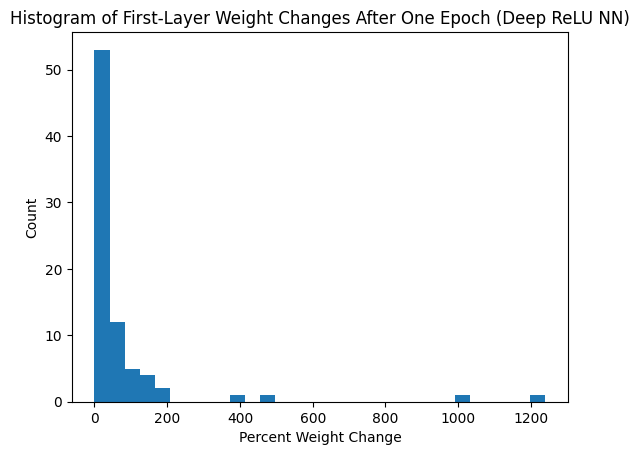

In [69]:
plt.hist(relu_weight_change.ravel(), bins=30)
plt.title("Histogram of First-Layer Weight Changes After One Epoch (Deep ReLU NN)")
plt.xlabel("Percent Weight Change")
plt.ylabel("Count")
plt.show()

---

Leaky Relu:

---

In [70]:
# Build and inspect the deep network with leaky relu
lrelu_model = get_model("leaky_relu")
lrelu_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,091 (4.26 KB)

 Trainable params: 1,091 (4.26 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# Extract initial first layer weights before training
first_layer_weights_before = lrelu_model.get_weights()[0].copy()
first_layer_weights_before

array([[ 0.05380613, -0.31023073, -0.05465764, -0.2963314 ,  0.4633602 ,
         0.14552552,  0.2111265 ,  0.56583726,  0.5549047 ,  0.5562142 ],
       [ 0.17691761,  0.21550095,  0.27590483, -0.29685187,  0.18748152,
         0.1106264 ,  0.13073629, -0.04217803,  0.25320327,  0.1984281 ],
       [ 0.28311056, -0.37156555, -0.31018806, -0.28246212,  0.45238125,
         0.05439985,  0.26562697,  0.2645862 , -0.3758216 , -0.5153434 ],
       [-0.5111825 , -0.04796189,  0.23387116,  0.07735091,  0.31854582,
        -0.43103397,  0.01762414,  0.43356395, -0.5268683 , -0.1780611 ],
       [-0.36529046,  0.5594201 ,  0.14684284, -0.4729202 ,  0.2461623 ,
         0.51716626,  0.34677118,  0.48655248,  0.55341923, -0.2243124 ],
       [-0.00198394, -0.26823437, -0.30013046, -0.25219154,  0.5380224 ,
        -0.25923654, -0.2838809 , -0.38085067,  0.06127328, -0.38206297],
       [ 0.31619972,  0.05554932, -0.33873773, -0.0206365 , -0.22541073,
         0.25523913,  0.23841721,  0.04037857

In [72]:
# Train for one epoch only to highlight slow (vanishing) updates
history = lrelu_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

# Extract updated first layer weights after training
first_layer_weights_after = lrelu_model.get_weights()[0].copy()
first_layer_weights_after

array([[ 0.08279602, -0.3236475 , -0.06592607, -0.30477825,  0.45795685,
         0.14316994,  0.21211484,  0.5716606 ,  0.55957466,  0.57043105],
       [ 0.1941227 ,  0.2028484 ,  0.2695278 , -0.3006626 ,  0.18063737,
         0.11105303,  0.12907681, -0.0406398 ,  0.25963107,  0.20599428],
       [ 0.29878733, -0.38087514, -0.31428993, -0.28883484,  0.44525716,
         0.05520399,  0.26333654,  0.26556352, -0.3698738 , -0.5075186 ],
       [-0.50279146, -0.05617595,  0.23298422,  0.0739596 ,  0.31049722,
        -0.428065  ,  0.01338   ,  0.43163526, -0.5198755 , -0.17380129],
       [-0.3902052 ,  0.55543536,  0.16344821, -0.46349543,  0.23456608,
         0.5262941 ,  0.33422437,  0.47149298,  0.56389725, -0.24123564],
       [-0.00697117, -0.27378517, -0.29335743, -0.25142673,  0.52768975,
        -0.25227997, -0.2925037 , -0.38889188,  0.0706884 , -0.38458574],
       [ 0.3228373 ,  0.04654119, -0.33962324, -0.0225753 , -0.23369984,
         0.25830448,  0.23383443,  0.03771952

In [73]:
# Get learning rate from optimizer config
learning_rate = tf.keras.optimizers.Adam().learning_rate.numpy()  # Default is 0.001
learning_rate

np.float32(0.001)

In [74]:
# Calculate change and percent change in weights
lrelu_gradient, lrelu_weight_change = change_in_weight_gradient(first_layer_weights_before, first_layer_weights_after, learning_rate)
relu_gradient

array([[  54.096786 , -522.60986  ,  383.9176   , -452.20837  ,
         148.57237  ,  498.74103  ,    4.391372 ,    0.       ,
        -182.16763  ,    0.       ],
       [ -77.55741  , -240.10886  ,  108.16618  , -164.66179  ,
          25.129854 ,  204.42023  ,    7.856562 ,    0.       ,
         -69.735466 ,    0.       ],
       [ -42.102512 , -297.41965  ,  162.07468  , -231.77458  ,
          46.32625  ,  284.44403  ,   11.268824 ,    0.       ,
         -73.92785  ,    0.       ],
       [ -86.47777  , -133.93132  ,   29.497622 ,  -83.16086  ,
           7.248461 ,  129.06908  ,   13.257354 ,    0.       ,
         -31.698107 ,    0.       ],
       [   9.980231 ,  -47.3679   ,   -9.691745 ,  -19.602789 ,
          18.600508 ,   12.224196 ,   17.133593 ,    0.       ,
         -91.724075 ,    0.       ],
       [-115.81126  , -121.47775  ,  -13.194859 ,  -45.955387 ,
         -20.339905 ,   76.83165  ,    7.5741296,    0.       ,
         -55.930016 ,    0.       ],
       [ -

In [75]:
lrelu_weight_change

array([[5.3878433e+01, 4.3247705e+00, 2.0616400e+01, 2.8504715e+00,
        1.1661209e+00, 1.6186684e+00, 4.6812427e-01, 1.0291500e+00,
        8.4157950e-01, 2.5560009e+00],
       [9.7249165e+00, 5.8712254e+00, 2.3113191e+00, 1.2837155e+00,
        3.6505721e+00, 3.8565400e-01, 1.2693360e+00, 3.6470065e+00,
        2.5385907e+00, 3.8130608e+00],
       [5.5373302e+00, 2.5055041e+00, 1.3223825e+00, 2.2561326e+00,
        1.5747992e+00, 1.4782116e+00, 8.6227226e-01, 3.6937207e-01,
        1.5826123e+00, 1.5183735e+00],
       [1.6414926e+00, 1.7126223e+01, 3.7924597e-01, 4.3843284e+00,
        2.5266676e+00, 6.8880117e-01, 2.4081400e+01, 4.4484490e-01,
        1.3272307e+00, 2.3923304e+00],
       [6.8205290e+00, 7.1230000e-01, 1.1308265e+01, 1.9928892e+00,
        4.7108016e+00, 1.7649751e+00, 3.6181805e+00, 3.0951443e+00,
        1.8933241e+00, 7.5444999e+00],
       [2.5138013e+02, 2.0693851e+00, 2.2566936e+00, 3.0326828e-01,
        1.9204859e+00, 2.6834865e+00, 3.0374799e+00, 2.11

In [76]:
print("\nFirst Layer Weights (Before Training):\n", first_layer_weights_before)
print("\nFirst Layer Weights (After Training):\n", first_layer_weights_after)
print("\nCalculated Gradient for First Layer:\n", lrelu_gradient)
print("\nPercent Change in First Layer Weights:\n", lrelu_weight_change)


First Layer Weights (Before Training):
 [[ 0.05380613 -0.31023073 -0.05465764 -0.2963314   0.4633602   0.14552552
   0.2111265   0.56583726  0.5549047   0.5562142 ]
 [ 0.17691761  0.21550095  0.27590483 -0.29685187  0.18748152  0.1106264
   0.13073629 -0.04217803  0.25320327  0.1984281 ]
 [ 0.28311056 -0.37156555 -0.31018806 -0.28246212  0.45238125  0.05439985
   0.26562697  0.2645862  -0.3758216  -0.5153434 ]
 [-0.5111825  -0.04796189  0.23387116  0.07735091  0.31854582 -0.43103397
   0.01762414  0.43356395 -0.5268683  -0.1780611 ]
 [-0.36529046  0.5594201   0.14684284 -0.4729202   0.2461623   0.51716626
   0.34677118  0.48655248  0.55341923 -0.2243124 ]
 [-0.00198394 -0.26823437 -0.30013046 -0.25219154  0.5380224  -0.25923654
  -0.2838809  -0.38085067  0.06127328 -0.38206297]
 [ 0.31619972  0.05554932 -0.33873773 -0.0206365  -0.22541073  0.25523913
   0.23841721  0.04037857 -0.5237703   0.36059672]
 [ 0.5085497   0.00145054  0.5754328  -0.28473818 -0.47323555 -0.36094564
   0.466457

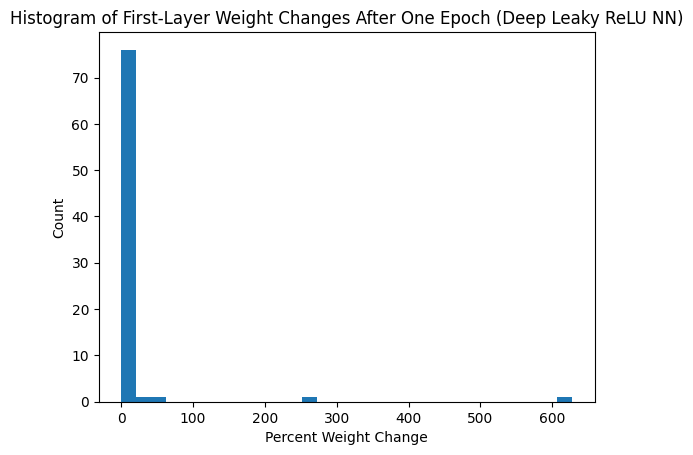

In [77]:
plt.hist(lrelu_weight_change.ravel(), bins=30)
plt.title("Histogram of First-Layer Weight Changes After One Epoch (Deep Leaky ReLU NN)")
plt.xlabel("Percent Weight Change")
plt.ylabel("Count")
plt.show()

---

PRelu

---

---

swiss:

---

In [78]:
# Build and inspect the deep network with swish
swish_model = get_model("swish")
swish_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,091 (4.26 KB)

 Trainable params: 1,091 (4.26 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Extract initial first layer weights before training
first_layer_weights_before = swish_model.get_weights()[0].copy()
first_layer_weights_before

array([[ 0.08854276,  0.1783396 ,  0.39431953,  0.4018752 , -0.03859723,
         0.08990431, -0.5162906 ,  0.36495584,  0.05943978, -0.07864237],
       [ 0.17542881, -0.2661415 , -0.52952   , -0.2538687 , -0.51044226,
         0.2671852 , -0.5575961 , -0.04107285, -0.53588647, -0.305502  ],
       [ 0.5066664 , -0.3718198 , -0.25538394,  0.1476394 , -0.4084677 ,
         0.41517985,  0.20510197, -0.1400072 , -0.0471704 ,  0.46792483],
       [ 0.19982082,  0.11106706,  0.30817783,  0.27858186, -0.4953338 ,
        -0.39453635, -0.3774807 , -0.04220641,  0.48457062,  0.4628986 ],
       [ 0.18304408,  0.05207503, -0.24095798, -0.3766249 , -0.08625463,
        -0.48846787,  0.19964933, -0.02425742, -0.17071769, -0.00169832],
       [-0.19789937,  0.19367802,  0.3226704 ,  0.39757955, -0.49083397,
         0.5590211 , -0.3110956 ,  0.19922781,  0.14822757, -0.53541297],
       [-0.0599575 ,  0.25933164,  0.03622288,  0.3311025 , -0.30986926,
         0.4190206 , -0.03518689,  0.4938283 

In [80]:
# Train for one epoch only to highlight slow (vanishing) updates
history = swish_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), verbose=0)

# Extract updated first layer weights after training
first_layer_weights_after = swish_model.get_weights()[0].copy()
first_layer_weights_after

array([[-0.15000176,  0.4099323 ,  0.3617153 ,  0.5491765 , -0.03859723,
         0.05882529, -0.31057942,  0.7868939 ,  0.05943978, -0.37858588],
       [ 0.07282436, -0.15151776, -0.57251143, -0.15330166, -0.51044226,
         0.24510682, -0.43936256,  0.08367895, -0.53588647, -0.28074074],
       [ 0.40001452, -0.2472483 , -0.30044544,  0.22034445, -0.4084677 ,
         0.38738647,  0.31888214,  0.03585068, -0.0471704 ,  0.42571402],
       [ 0.15764098,  0.1771662 ,  0.25988296,  0.33049324, -0.4953338 ,
        -0.42052025, -0.3047028 , -0.02341882,  0.48457062,  0.5676562 ],
       [ 0.1743949 ,  0.07095306, -0.27902946, -0.26601765, -0.08625463,
        -0.5142471 ,  0.20561264, -0.00757524, -0.17071769,  0.02769736],
       [-0.21367383,  0.23623574,  0.2675475 ,  0.4924242 , -0.49083397,
         0.5256099 , -0.26744565,  0.18794799,  0.14822757, -0.38156003],
       [-0.10359697,  0.33412316, -0.01017293,  0.4325348 , -0.30986935,
         0.3945133 ,  0.05481065,  0.52550596

In [81]:
# Get learning rate from optimizer config
learning_rate = tf.keras.optimizers.Adam().learning_rate.numpy()  # Default is 0.001
learning_rate

np.float32(0.001)

In [82]:
# Calculate change and percent change in weights
swish_gradient, swish_weight_change = change_in_weight_gradient(first_layer_weights_before, first_layer_weights_after, learning_rate)
swish_gradient

array([[ 2.38544510e+02, -2.31592667e+02,  3.26042442e+01,
        -1.47301315e+02,  0.00000000e+00,  3.10790157e+01,
        -2.05711182e+02, -4.21938049e+02,  0.00000000e+00,
         2.99943481e+02],
       [ 1.02604446e+02, -1.14623734e+02,  4.29914589e+01,
        -1.00567039e+02,  0.00000000e+00,  2.20783939e+01,
        -1.18233528e+02, -1.24751785e+02,  0.00000000e+00,
        -2.47612591e+01],
       [ 1.06651894e+02, -1.24571480e+02,  4.50614967e+01,
        -7.27050552e+01,  0.00000000e+00,  2.77933769e+01,
        -1.13780167e+02, -1.75857864e+02,  0.00000000e+00,
         4.22108154e+01],
       [ 4.21798363e+01, -6.60991364e+01,  4.82948685e+01,
        -5.19113808e+01,  0.00000000e+00,  2.59838982e+01,
        -7.27778931e+01, -1.87875900e+01,  0.00000000e+00,
        -1.04757599e+02],
       [ 8.64916992e+00, -1.88780270e+01,  3.80714798e+01,
        -1.10607262e+02,  0.00000000e+00,  2.57792454e+01,
        -5.96331024e+00, -1.66821823e+01,  0.00000000e+00,
        -2.

In [83]:
swish_weight_change

array([[2.6941165e+02, 1.2986050e+02, 8.2684832e+00, 3.6653496e+01,
        0.0000000e+00, 3.4568996e+01, 3.9844070e+01, 1.1561346e+02,
        0.0000000e+00, 3.8140192e+02],
       [5.8487797e+01, 4.3068718e+01, 8.1189489e+00, 3.9613804e+01,
        0.0000000e+00, 8.2633295e+00, 2.1204153e+01, 3.0373300e+02,
        0.0000000e+00, 8.1051054e+00],
       [2.1049726e+01, 3.3503189e+01, 1.7644609e+01, 4.9245026e+01,
        0.0000000e+00, 6.6942987e+00, 5.5474930e+01, 1.2560631e+02,
        0.0000000e+00, 9.0208540e+00],
       [2.1108829e+01, 5.9512821e+01, 1.5671105e+01, 1.8634157e+01,
        0.0000000e+00, 6.5859332e+00, 1.9279900e+01, 4.4513599e+01,
        0.0000000e+00, 2.2630789e+01],
       [4.7251844e+00, 3.6251595e+01, 1.5800052e+01, 2.9368015e+01,
        0.0000000e+00, 5.2775726e+00, 2.9868922e+00, 6.8771461e+01,
        0.0000000e+00, 1.7308729e+03],
       [7.9709492e+00, 2.1973436e+01, 1.7083349e+01, 2.3855513e+01,
        0.0000000e+00, 5.9767342e+00, 1.4031037e+01, 5.66

In [84]:
print("\nFirst Layer Weights (Before Training):\n", first_layer_weights_before)
print("\nFirst Layer Weights (After Training):\n", first_layer_weights_after)
print("\nCalculated Gradient for First Layer:\n", swish_gradient)
print("\nPercent Change in First Layer Weights:\n", swish_weight_change)


First Layer Weights (Before Training):
 [[ 0.08854276  0.1783396   0.39431953  0.4018752  -0.03859723  0.08990431
  -0.5162906   0.36495584  0.05943978 -0.07864237]
 [ 0.17542881 -0.2661415  -0.52952    -0.2538687  -0.51044226  0.2671852
  -0.5575961  -0.04107285 -0.53588647 -0.305502  ]
 [ 0.5066664  -0.3718198  -0.25538394  0.1476394  -0.4084677   0.41517985
   0.20510197 -0.1400072  -0.0471704   0.46792483]
 [ 0.19982082  0.11106706  0.30817783  0.27858186 -0.4953338  -0.39453635
  -0.3774807  -0.04220641  0.48457062  0.4628986 ]
 [ 0.18304408  0.05207503 -0.24095798 -0.3766249  -0.08625463 -0.48846787
   0.19964933 -0.02425742 -0.17071769 -0.00169832]
 [-0.19789937  0.19367802  0.3226704   0.39757955 -0.49083397  0.5590211
  -0.3110956   0.19922781  0.14822757 -0.53541297]
 [-0.0599575   0.25933164  0.03622288  0.3311025  -0.30986926  0.4190206
  -0.03518689  0.4938283  -0.49430194  0.5675107 ]
 [ 0.48680496  0.23031288 -0.5296502  -0.37281996  0.03945518  0.18312389
   0.04297274

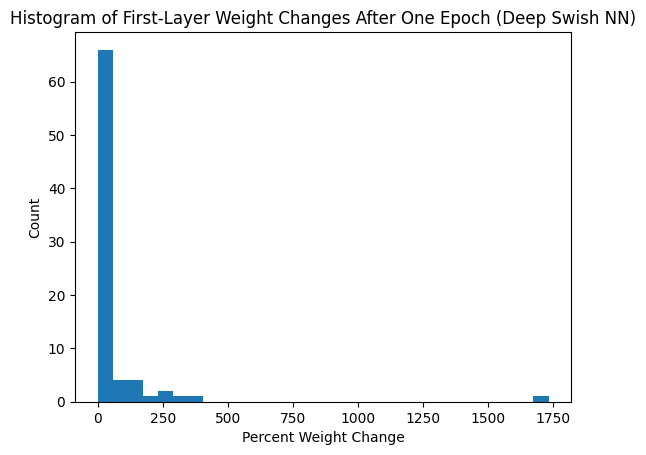

In [85]:
plt.hist(swish_weight_change.ravel(), bins=30)
plt.title("Histogram of First-Layer Weight Changes After One Epoch (Deep Swish NN)")
plt.xlabel("Percent Weight Change")
plt.ylabel("Count")
plt.show()

---

---